From https://github.com/seung-lab/cloud-volume/wiki/Reading-Public-Data-Examples

If you're new to CloudVolume, it can be helpful to try using it with a public dataset to get a feel for it. Start by [following the instructions](https://github.com/seung-lab/cloud-volume#setup) to install CloudVolume, then come back here!

We'll use the dataset by Kasthuri et al for these examples. [Open Viewer](https://neuroglancer-demo.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://neuroglancer-public-data/kasthuri2011/image%22%2C%22type%22:%22image%22%2C%22name%22:%22original-image%22%7D%2C%7B%22source%22:%22precomputed://gs://neuroglancer-public-data/kasthuri2011/image_color_corrected%22%2C%22type%22:%22image%22%2C%22name%22:%22corrected-image%22%7D%2C%7B%22source%22:%22precomputed://gs://neuroglancer-public-data/kasthuri2011/ground_truth%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.63%2C%22notSelectedAlpha%22:0.14%2C%22segments%22:%5B%2213%22%2C%2215%22%2C%222282%22%2C%223189%22%2C%223207%22%2C%223208%22%2C%223224%22%2C%223228%22%2C%223710%22%2C%223758%22%2C%224027%22%2C%22444%22%2C%224651%22%2C%224901%22%2C%224965%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22ground_truth%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B6%2C6%2C30%5D%2C%22voxelCoordinates%22:%5B5188%2C9096%2C1198%5D%7D%7D%2C%22zoomFactor%22:22.573112129999547%7D%2C%22perspectiveOrientation%22:%5B-0.0040475670248270035%2C-0.9566215872764587%2C-0.22688281536102295%2C-0.18271005153656006%5D%2C%22perspectiveZoom%22:340.35867907175077%2C%22layout%22:%224panel%22%7D)

Kasthuri, Narayanan, et al. "Saturated reconstruction of a volume of neocortex." Cell 162.3 (2015): 648-661. ([link](https://www.sciencedirect.com/science/article/pii/S0092867415008247?via%3Dihub))

## Downloading EM Images

Neuroglancer datasets are often accessed as `precomputed://protocol://bucket/dataset/layer`. To initialize a CloudVolume instance, we can omit the precomputed:// part. In this example, we'll use the `gs://` protocol, which means it's on Google Cloud Storage, but `s3://` and other protocols are possible as well. For public datasets hosted on Google Cloud Storage, if you replace the `gs://` protocol with `https://storage.googleapis.com`, you'll be able to read them without an authentication token.

In this example, we download a 512x512x64 voxel patch of electron microscope images from the Kasthrui et al dataset at the highest resolution.

In [1]:
from cloudvolume import CloudVolume, view

# 1. Initialize a CloudVolume object which will know how to read from this dataset layer. 
cv = CloudVolume(
   'https://storage.googleapis.com/neuroglancer-public-data/kasthuri2011/image_color_corrected', 
    progress=True, # shows progress bar
    cache=True, # cache to disk to avoid repeated downloads
    # parallel=True, # uncomment to try parallel download!
)

# 2. Download context around the point in the Neuroglancer link above
#    into a numpy array.
# argument one is the (x,y,z) coordinate from neuroglancer
# mip=resolution level (smaller mips are higher resolution, highest is 0)
# size is in voxels
img = cv.download_point( (5188, 9096, 1198), mip=0, size=(512, 512, 64) )

# 3. Visualize the image! 
# Open your browser to https://localhost:8080 to view
# Press ctrl-C to continue script execution.
# view(img)

# 4. When you're done experimenting, clean up the space we used on disk.
# cv.cache.flush() 

(512, 512, 64)


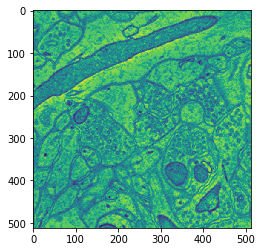

In [8]:
import numpy as np
import matplotlib.pyplot as plt
img = np.squeeze(img)
print(img.shape)
plt.figure()
plt.imshow(img[:,:,10])
plt.show()

## Downloading Segmentation & Meshes
Working with segmentation is very similar, but you may also have access to meshes and skeletons. This dataset only has meshes, so we won't demonstrate skeletons in this example. In the previous example, we were reading from the `image_color_corrected` layer, but in this one we'll read from the `ground_truth` layer.

In [2]:
# from cloudvolume import CloudVolume, view 

# cv = CloudVolume(
#     'https://storage.googleapis.com/neuroglancer-public-data/kasthuri2011/ground_truth',
#     progress=True, # shows progress bar
#     cache=True, # cache to disk to avoid repeated downloads
#     # parallel=True, # uncomment to try parallel download!
# )

# img = cv.download_point( (5188, 9096, 1198), mip=0, size=(512, 512, 64) )

# # segmentation=True activates the segmentation mode
# # of the microviewer. If it was False, it would display
# # as a raw image, which might be very dark if the label
# # values are small.
# view(img, segmentation=True)

# # Get as mesh object
# mesh = cv.mesh.get(13)
# # Save to disk at ./13.obj which can be visualized in MeshLab or Blender
# cv.mesh.save(13, file_format='obj')

# # cv.cache.flush()